**Fashion MNIST Data Classification**

**Step 1 - Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sns
import keras
import matplotlib.pyplot as plt



**Step 2 - Load Data**

In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of data

In [ ]:
X_train.shape,y_train.shape,"***************", X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle", "boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle',
 'boot']

In [ ]:
#show image

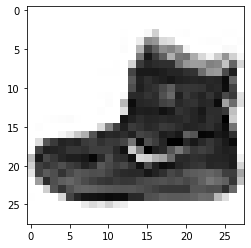

In [ ]:
plt.imshow(X_train[0],cmap='Greys')

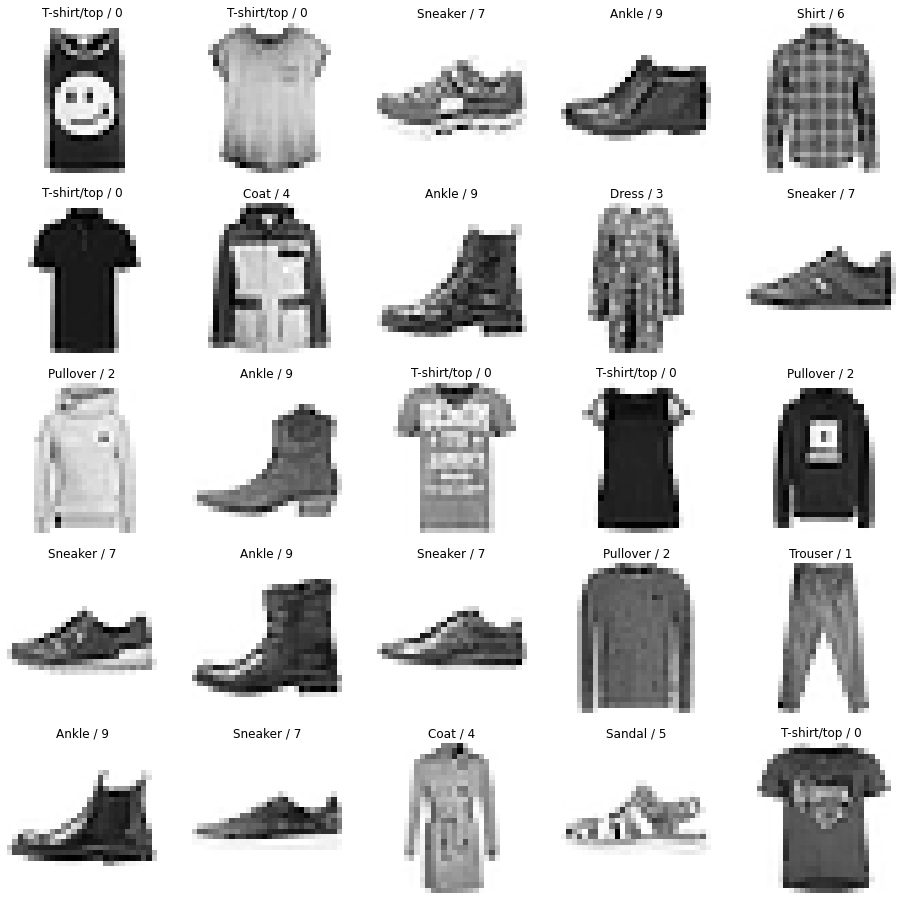

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):

  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels [y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims (X_train, -1)

In [ ]:
X_train.ndim

5

In [ ]:
 X_test = np.expand_dims (X_test, -1)

In [ ]:
# feature scaling

In [ ]:
X_train = X_train/255 
X_test= X_test/255

In [ ]:
# Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_Validation,y_train,y_Validation = train_test_split(X_train,y_train, test_size=0.2,  random_state=2020)


In [ ]:
X_train.shape, X_Validation.shape,y_train.shape, y_Validation.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

**Step 3 - Building the CNN Model**

In [ ]:
model=keras.models.Sequential([
                          keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1),padding="valid", activation="relu",input_shape=[28,28,1]), 
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers. Flatten(),
                          keras.layers.Dense(units=128, activation='relu'), 
                          keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 24s 240ms/step - loss: 0.6148 - accuracy: 0.7943 - val_loss: 0.4536 - val_accuracy: 0.8399
Epoch 2/10
94/94 [==============================] - 18s 191ms/step - loss: 0.3806 - accuracy: 0.8662 - val_loss: 0.3591 - val_accuracy: 0.8755
Epoch 3/10
94/94 [==============================] - 18s 191ms/step - loss: 0.3317 - accuracy: 0.8848 - val_loss: 0.3314 - val_accuracy: 0.8853
Epoch 4/10
94/94 [==============================] - 18s 192ms/step - loss: 0.3001 - accuracy: 0.8941 - val_loss: 0.3159 - val_accuracy: 0.8903
Epoch 5/10
94/94 [==============================] - 18s 192ms/step - loss: 0.2760 - accuracy: 0.9023 - val_loss: 0.3108 - val_accuracy: 0.8925
Epoch 6/10
94/94 [==============================] - 18s 192ms/step - loss: 0.2658 - accuracy: 0.9066 - val_loss: 0.3036 - val_accuracy: 0.8935
Epoch 7/10
94/94 [==============================] - 18s 190ms/step - loss: 0.2470 - accuracy: 0.9119 - val_loss: 0.2746 - val_accuracy: 0.9016

In [ ]:
y_pred = model.predict(X_test) 
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.11, 0.14, 0.01]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2664 - accuracy: 0.9039


[0.2664211690425873, 0.9039000272750854]

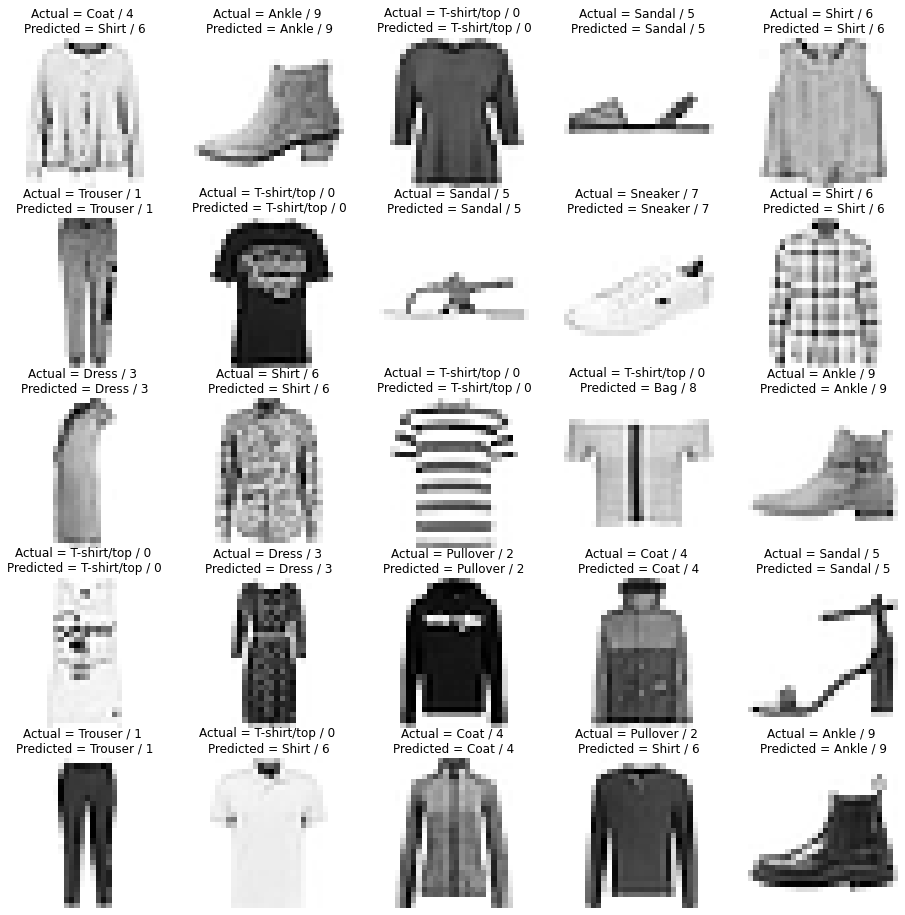

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys') 
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels [np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

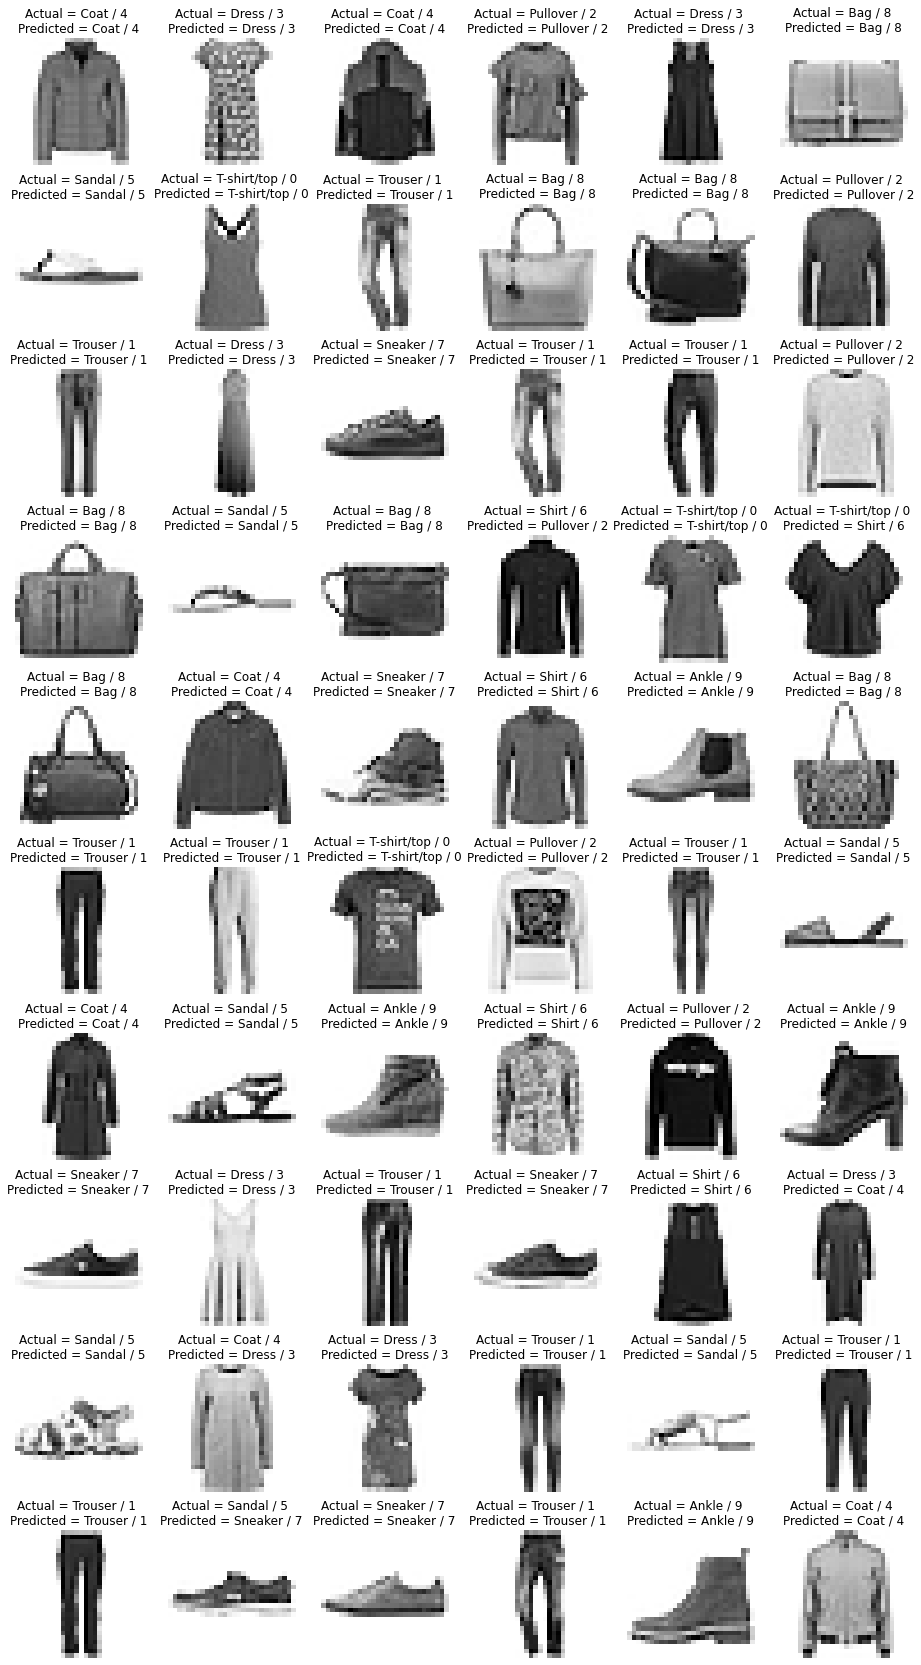

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys') 
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels [np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
"""##Confusion matrix"""""

'##Confusion matrix'

In [ ]:
from sklearn.metrics import confusion_matrix 
plt.figure(figsize=(16,9)) 
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(y_test, y_pred_labels, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.87      0.85      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.86      0.83      0.84      1000
     Class 3       0.91      0.91      0.91      1000
     Class 4       0.83      0.89      0.86      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.75      0.69      0.72      1000
     Class 7       0.95      0.96      0.95      1000
     Class 8       0.96      0.98      0.97      1000
     Class 9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
#save model

model.save('fashion_mnist_cnn_model.h5')

**Build 2 Complex CNN**

In [ ]:
#Building CNN Model

cnn_model2=keras.models.Sequential([
                          keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1),padding="valid", activation="relu",input_shape=[28,28,1]), 
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2),padding="same", activation="relu"), 
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers. Flatten(),
                          keras.layers.Dense(units=128, activation='relu'), 
                          keras.layers.Dropout(0.25),
                          keras.layers.Dense(units=256, activation='relu'), 
                          keras.layers.Dropout(0.25),
                          keras.layers.Dense(units=128, activation='relu'), 
                          keras.layers.Dense(units=10,activation='softmax')
])

#compile the model
cnn_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train the model
cnn_model2.fit(X_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

cnn_model2.save('fashion_mnist_cnn_model2.h5')

"""######## very complex model """

#Building CNN model 
cnn_model3=keras.models.Sequential([
                          keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1),padding="valid", activation="relu",input_shape=[28,28,1]), 
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2),padding="same", activation="relu"), 
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2),padding="same", activation="relu"), 
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers. Flatten(),
                          keras.layers.Dense(units=128, activation='relu'), 
                          keras.layers.Dropout(0.25),
                          keras.layers.Dense(units=256, activation='relu'), 
                          keras.layers.Dropout(0.25),
                          keras.layers.Dense(units=256, activation='relu'), 
                          keras.layers.Dropout(0.25),
                          keras.layers.Dense(units=128, activation='relu'), 
                          keras.layers.Dropout(0.10),
                          keras.layers.Dense(units=10,activation='softmax')
])

#compile the model
cnn_model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train the model
cnn_model3.fit(X_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

cnn_model3.save('fashion_mnist_cnn_model3.h5')

cnn_model3.evaluate(X_test,y_test)



Epoch 1/20
94/94 [==============================] - 23s 239ms/step - loss: 1.0390 - accuracy: 0.6072 - val_loss: 0.6191 - val_accuracy: 0.7593
Epoch 2/20
94/94 [==============================] - 23s 241ms/step - loss: 0.5830 - accuracy: 0.7778 - val_loss: 0.4828 - val_accuracy: 0.8146
Epoch 3/20
94/94 [==============================] - 23s 241ms/step - loss: 0.4839 - accuracy: 0.8219 - val_loss: 0.4143 - val_accuracy: 0.8478
Epoch 4/20
94/94 [==============================] - 23s 240ms/step - loss: 0.4319 - accuracy: 0.8438 - val_loss: 0.3878 - val_accuracy: 0.8577
Epoch 5/20
94/94 [==============================] - 23s 241ms/step - loss: 0.3949 - accuracy: 0.8554 - val_loss: 0.3581 - val_accuracy: 0.8673
Epoch 6/20
94/94 [==============================] - 23s 240ms/step - loss: 0.3632 - accuracy: 0.8691 - val_loss: 0.3366 - val_accuracy: 0.8737
Epoch 7/20
94/94 [==============================] - 23s 241ms/step - loss: 0.3491 - accuracy: 0.8731 - val_loss: 0.3350 - val_accuracy: 0.8741

[0.29612135887145996, 0.9077000021934509]